# Import

In [5]:
import sys
nephosemdir = "D:/OneDrive - KU Leuven/KUL/nephosem"
tokens_coordinates_dir = 'tokens_coordinates'
SOC_analysis_dir = 'SOC_analysis'

sys.path.append(nephosemdir)
sys.path.append(tokens_coordinates_dir)
sys.path.append(SOC_analysis_dir)

mydir = f"./"

In [6]:
# tokens_coordinates
import get_model_data
import get_token_ids
import importlib
# Import the module before reloading
importlib.reload(get_token_ids)
importlib.reload(get_model_data)

<module 'get_model_data' from 'd:\\OneDrive - KU Leuven\\KUL\\SOCFlow\\tokens_coordinates\\get_model_data.py'>

In [7]:
# Nephosem
from nephosem import ConfigLoader, TypeTokenMatrix
conf = ConfigLoader()
settings = conf.update_config('config.ini')

In [8]:
# SOC_analysis
import SOC_analysis
import importlib
# Import the module before reloading
importlib.reload(SOC_analysis)

<module 'SOC_analysis' from 'd:\\OneDrive - KU Leuven\\KUL\\SOCFlow\\SOC_analysis\\SOC_analysis.py'>

In [9]:
analyser = SOC_analysis.SOCAnalyser()

token = 'time_final_no_det'
model = 'time.bound3-3TIME.PPMIweight.LENGTH5000.SOCPOSNVAA'
input_folder = './input/'
output_folder = './output/'

# Get the coordinates of the tokens

In [10]:
# Get the coordinates, senses of the tokens of the model.
get_model_data.get_model_data(token, model, input_folder)

The coordinates of time_final_no_det-time.bound3-3TIME.PPMIweight.LENGTH5000.SOCPOSNVAA were extracted
The senses of time_final_no_det-time.bound3-3TIME.PPMIweight.LENGTH5000.SOCPOSNVAA were added successfully.
The model data was extracted


In [11]:
# Visualisation to get the token ids
get_token_ids.get_token_ids(token, model, input_folder)

Open the app in your browser (http://127.0.0.1:8050).


# Get the sub-matrix of the SOC matrix

In [12]:
# List of tokens copied from the token_coordinate
token_list = ['time/NN/Encow_sample_4340/41', 'time/NN/Encow_sample_27616/24', 'time/NN/Encow_sample_20274/16', 'time/NN/Encow_sample_31654/62', 'time/NN/Encow_sample_20185/38', 'time/NN/Encow_sample_2091/31', 'time/NN/Encow_sample_19697/12', 'time/NN/Encow_sample_2958/92', 'time/NN/Encow_sample_28176/41', 'time/NN/Encow_sample_29404/44', 'time/NN/Encow_sample_23189/18', 'time/NN/Encow_sample_3829/43', 'time/NN/Encow_sample_11344/13', 'time/NN/Encow_sample_28496/50', 'time/NN/Encow_sample_1117/53', 'time/NN/Encow_sample_232/29', 'time/NN/Encow_sample_22361/83', 'time/NN/Encow_sample_30912/54', 'time/NN/Encow_sample_1840/58', 'time/NN/Encow_sample_3400/19', 'time/NN/Encow_sample_10232/58', 'time/NN/Encow_sample_21435/113', 'time/NN/Encow_sample_19352/39', 'time/NN/Encow_sample_20378/46', 'time/NN/Encow_sample_29404/48', 'time/NN/Encow_sample_31249/26', 'time/NN/Encow_sample_30196/39', 'time/NN/Encow_sample_17271/14']

# token_list = ['time/NN/Encow_sample_17659/14', 'time/NN/Encow_sample_26462/48', 'time/NN/Encow_sample_5900/30', 'time/NN/Encow_sample_1972/52', 'time/NN/Encow_sample_14495/40', 'time/NN/Encow_sample_32645/34', 'time/NN/Encow_sample_4025/87', 'time/NN/Encow_sample_27713/27', 'time/NN/Encow_sample_30840/91', 'time/NN/Encow_sample_5042/47', 'time/NN/Encow_sample_32177/43', 'time/NN/Encow_sample_1678/27', 'time/NN/Encow_sample_6465/17', 'time/NN/Encow_sample_19950/5', 'time/NN/Encow_sample_8102/30', 'time/NN/Encow_sample_28453/78', 'time/NN/Encow_sample_15457/37', 'time/NN/Encow_sample_6233/37', 'time/NN/Encow_sample_3956/86', 'time/NN/Encow_sample_25060/50', 'time/NN/Encow_sample_2910/14', 'time/NN/Encow_sample_13911/71', 'time/NN/Encow_sample_23889/74', 'time/NN/Encow_sample_4492/57', 'time/NN/Encow_sample_30555/87']

# Name of the sense/region
sense = 'time_3'

In [13]:
# Get the full SOC matrix
model_file = f'{input_folder}{model}.tcmx.soc.pac'
model_mtx = TypeTokenMatrix.load(model_file) # opens a matrix

# Get the submatrix of only the tokens under investigation
subset_rows = model_mtx.submatrix(row = token_list)
subset_rows.to_csv(f'{input_folder}{sense}_SOCs.csv', sep=',')

In [14]:
# List of POS tags
POS_list = []
SenSOC_file = 'input/time_3_SOCs.csv'
sub_SenSOC = 'time_3'

# Get the submatrix of only the POS tags
SOC_analysis.get_POS_submtx(SenSOC_file, sub_SenSOC, POS_list, input_folder)

# SOC Analysis

Elbow index: 77
Elbow SOC: Will/NP (Association Score: 0.0012034172303727437)


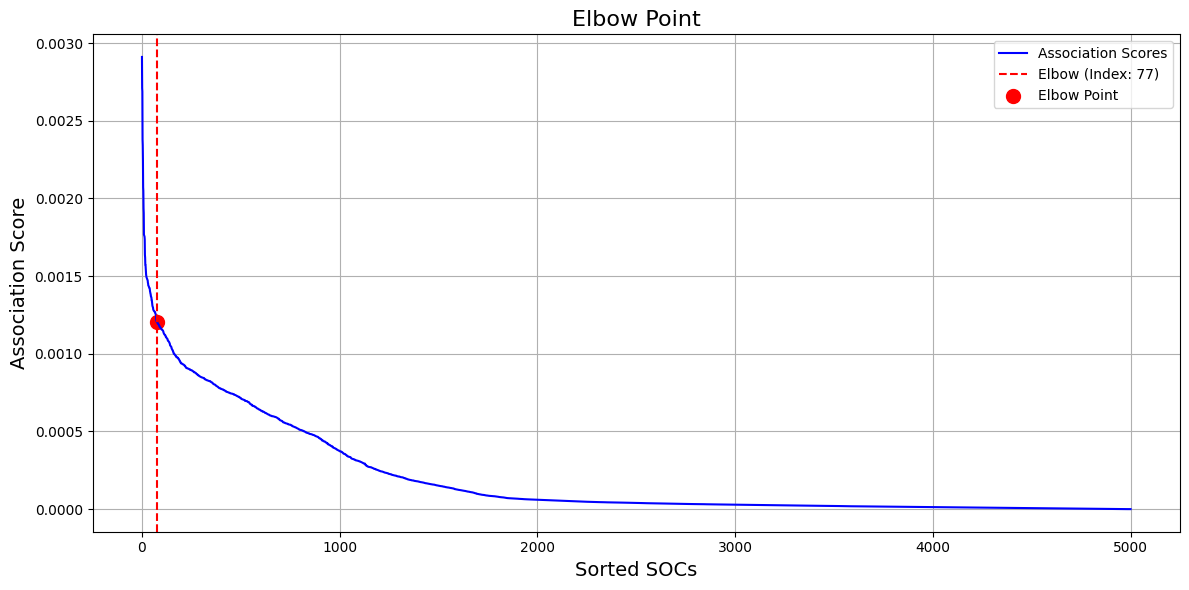

In [15]:
# Choose the submatrix
sub_SenSOC = 'time_3'
sub_senSOC_file = 'input/time_3_SOCs.csv'
mode = 'avg'

# Find the elbow
analyser.elbow_finder(sense, sub_senSOC_file, mode)

In [16]:
# Top n SOCs
n = 77
analyser.SOC_dist_vis(n, sub_SenSOC, output_folder, mode)

Top 77 SOCs extracted and saved to: ./output/top_77-time_3-avg_SOCs.csv


In [17]:
# Get the raw context for the tokens
analyser.get_context(token, sense, token_list, input_folder, output_folder)

Context for time_final_no_det-time_3 extracted and saved to ./output/time_final_no_det-time_3_context.csv.
